Give an image path: dataset/Bacterialblight/BACTERAILBLIGHT3_009.jpg
Input image:



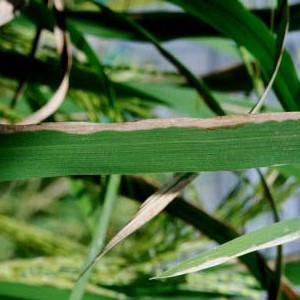

Recognized disease: Bacterialblight


In [3]:
import tensorflow as tf
from IPython.display import HTML
from base64 import b64encode
import numpy as np
import cv2
from tensorflow.keras.utils import img_to_array
import sys



def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (128,128))   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

try:
  model
except:
  model = tf.keras.models.load_model('RLDR_model.h5')


def recognize(image_dir):
  img = None
  try:
    img = open(image_dir, 'rb').read()
  except:
    print('No image found.')
    sys.exit()

  img_url = 'data:image/jpeg;base64,' + b64encode(img).decode()
  print('Input image:')
  display(HTML("<img src='%s' %s%s>" % (img_url, 128, 128)))

  maps = {0:'Bacterialblight', 1:'Blast', 2:'Brownspot', 3:'Tungro'}
  img_arr = convert_image_to_array(image_dir)
  img_arr = np.array(img_arr, dtype=np.float16) / 255.0
  img_arr = np.expand_dims(img_arr, 0)
  preds = model.predict(img_arr)
  label = np.argmax(preds)
  print('Recognized disease:', maps[label])

img_path = input('Give an image path: ')
recognize(img_path)